In [48]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline 

In [49]:
# reading the image
img = cv2.imread(r"C:\Users\gaura\Desktop\Excel Course\Data Science & Machine Learning Project\model\test_images\Peers hail _mind of a champion__ Maria....jpg")

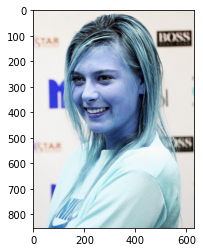

In [50]:
plt.imshow(img)

In [51]:
# Converting to grayscale
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(853, 630)

In [52]:
gray

array([[235, 235, 235, ..., 228, 228, 228],
       [235, 235, 235, ..., 228, 228, 228],
       [235, 235, 235, ..., 228, 228, 228],
       ...,
       [227, 227, 227, ..., 214, 214, 215],
       [227, 227, 227, ..., 214, 214, 215],
       [227, 227, 227, ..., 214, 214, 215]], dtype=uint8)

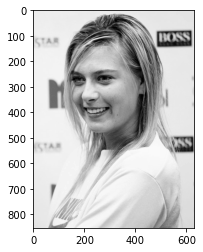

In [53]:
# Plotting an gray image
plt.imshow(gray, cmap="gray")

In [54]:
# Detecting Face and Eyes using haar cascade

face_cascade = cv2.CascadeClassifier(r"C:\Users\gaura\Desktop\Excel Course\Data Science & Machine Learning Project\model\opencv\haarcascade\haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier(r"C:\Users\gaura\Desktop\Excel Course\Data Science & Machine Learning Project\model\opencv\haarcascade\haarcascade_eye.xml")

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[ 83, 147, 331, 331]], dtype=int32)

In [55]:
(x,y,w,h) = faces[0]

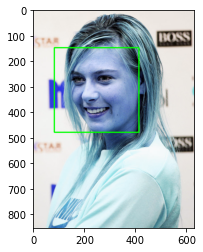

In [56]:
# Drawing rectangle around face
face_img = cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0),4)
plt.imshow(face_img)

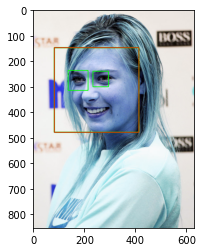

In [57]:
# Detect eyes
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)# Draw a rectangle over faces
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    # Iterate over eyes in the images
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

In [58]:
# Create cropped image
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

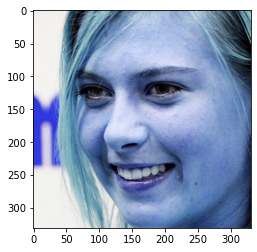

In [59]:
cropped_image = get_cropped_image_if_2_eyes(r"C:\Users\gaura\Desktop\Excel Course\Data Science & Machine Learning Project\model\test_images\Peers hail _mind of a champion__ Maria....jpg")
plt.imshow(cropped_image)

In [60]:
# Create cropped dataset folder
path_to_data = "C:/Users/gaura/Desktop/Excel Course/Data Science & Machine Learning Project/model/dataset/" 
path_to_cr_data = "C:/Users/gaura/Desktop/Excel Course/Data Science & Machine Learning Project/model/dataset/cropped/" 

In [61]:
# Get the path of individual folder and create a list of it
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [62]:
img_dirs

['C:/Users/gaura/Desktop/Excel Course/Data Science & Machine Learning Project/model/dataset/cropped',
 'C:/Users/gaura/Desktop/Excel Course/Data Science & Machine Learning Project/model/dataset/lionel messi',
 'C:/Users/gaura/Desktop/Excel Course/Data Science & Machine Learning Project/model/dataset/maria sharapova',
 'C:/Users/gaura/Desktop/Excel Course/Data Science & Machine Learning Project/model/dataset/serena williams',
 'C:/Users/gaura/Desktop/Excel Course/Data Science & Machine Learning Project/model/dataset/virat kohli']

In [63]:
# Create cropped folder
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [64]:
# Get cropped images
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  C:/Users/gaura/Desktop/Excel Course/Data Science & Machine Learning Project/model/dataset/cropped/lionel messi
Generating cropped images in folder:  C:/Users/gaura/Desktop/Excel Course/Data Science & Machine Learning Project/model/dataset/cropped/maria sharapova
Generating cropped images in folder:  C:/Users/gaura/Desktop/Excel Course/Data Science & Machine Learning Project/model/dataset/cropped/serena williams
Generating cropped images in folder:  C:/Users/gaura/Desktop/Excel Course/Data Science & Machine Learning Project/model/dataset/cropped/virat kohli


In [70]:
# Examine cropped folder and delete unwanted images
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'lionel messi': ['C:/Users/gaura/Desktop/Excel Course/Data Science & Machine Learning Project/model/dataset/cropped/lionel messi\\lionel messi1.png',
  'C:/Users/gaura/Desktop/Excel Course/Data Science & Machine Learning Project/model/dataset/cropped/lionel messi\\lionel messi10.png',
  'C:/Users/gaura/Desktop/Excel Course/Data Science & Machine Learning Project/model/dataset/cropped/lionel messi\\lionel messi11.png',
  'C:/Users/gaura/Desktop/Excel Course/Data Science & Machine Learning Project/model/dataset/cropped/lionel messi\\lionel messi12.png',
  'C:/Users/gaura/Desktop/Excel Course/Data Science & Machine Learning Project/model/dataset/cropped/lionel messi\\lionel messi13.png',
  'C:/Users/gaura/Desktop/Excel Course/Data Science & Machine Learning Project/model/dataset/cropped/lionel messi\\lionel messi14.png',
  'C:/Users/gaura/Desktop/Excel Course/Data Science & Machine Learning Project/model/dataset/cropped/lionel messi\\lionel messi15.png',
  'C:/Users/gaura/Desktop/Excel C

In [66]:
# Wavelet transform function

import numpy as np
import pywt
import cv2

def w2d(img, mode='haar',level=1):
    imArray = img
    # Convert to gray scale
    imArray = cv2.cvtColor(imArray, cv2.COLOR_RGB2GRAY)
    # Convert to float
    imArray = np.float32(imArray)
    imArray /= 255
    # Compute Coefficient
    coeffs = pywt.wavedec2(imArray, mode, level=level)

    # process coefficient
    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0

    # reconstruction
    imArray_H = pywt.waverec2(coeffs_H, mode)
    imArray_H *= 255
    imArray_H = np.uint8(imArray_H)  

    return imArray_H  

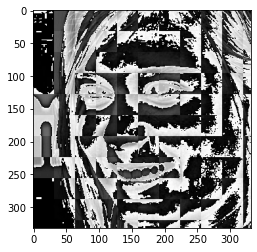

In [67]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

In [71]:
# Generate number for each class
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'lionel messi': 0,
 'maria sharapova': 1,
 'serena williams': 2,
 'virat kohli': 3}

In [76]:
# Stack the resize images and haar transformed resize image
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32, 32))# scaled the image
        img_har = w2d(img,'db1',5) # take haar transform of image
        scalled_img_har = cv2.resize(img_har, (32, 32)) # scaled haar transform image
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1))) # Stack image
        X.append(combined_img)
        y.append(class_dict[celebrity_name]) 

In [78]:
len(X[0])

4096

In [79]:
len(X)

92

In [80]:
# Convert it to float
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(92, 4096)

##### Train the Model

In [83]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
pipe = Pipeline([('scaler',StandardScaler()), ('svc',SVC(kernel='rbf',C=10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8695652173913043

In [85]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.78      0.88      0.82         8
           1       0.86      1.00      0.92         6
           2       1.00      0.75      0.86         4
           3       1.00      0.80      0.89         5

    accuracy                           0.87        23
   macro avg       0.91      0.86      0.87        23
weighted avg       0.89      0.87      0.87        23



##### GridSearchCV

In [86]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [87]:
model_params = {
    'svm':{
        'model': svm.SVC(gamma='auto', probability=True),
        'params':{
            'svc__C':[1,10,100,1000],
            'svc__kernel':['rbf','linear']
        }
    },
    'random_forest':{
        'model': RandomForestClassifier(),
        'params':{
            'randomforestclassifier__n_estimators':[1,5,10]
        }
    },
    'logistic_regression':{
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params':{
            'logisticregression__C': [1,5,10]
        }
    }
}

In [89]:
# Run gridsearchcv 
scores= []
best_estimators = {}
import pandas as pd

for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf = GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_

df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df    

,model,best_score,best_params
0,svm,0.754945,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.712088,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.782418,{'logisticregression__C': 1}


In [90]:
best_estimators['svm'].score(X_test, y_test)

0.8260869565217391

In [91]:
best_estimators['random_forest'].score(X_test, y_test)

0.6521739130434783

In [92]:
best_estimators['logistic_regression'].score(X_test, y_test)

0.8260869565217391

In [93]:
best_clf = best_estimators['svm']

In [95]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[7, 1, 0, 0],
       [0, 4, 2, 0],
       [0, 0, 4, 0],
       [1, 0, 0, 4]], dtype=int64)

Text(69.0, 0.5, 'Truth')

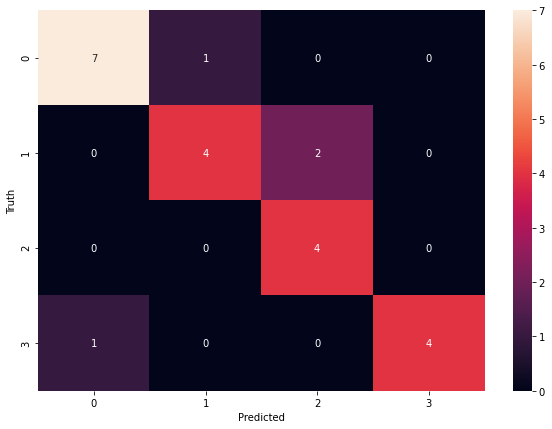

In [96]:
# Plot heatmap
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

##### Save the trained model

In [98]:
import joblib
# save the model as a pickle in a file
joblib.dump(best_clf,'saved_model.pkl')

['saved_model.pkl']

##### Save Class Dictionary

In [ ]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))